In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Customer Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Replacing blanks with 0 as tenure is and no totat charges are recorded

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", 0)
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df["customerID"].duplicated().sum()

0

In [10]:
def conv(value):
    if value == 1:
        return True
    else:
        return False
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

In [11]:
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,False,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,False,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,False,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,False,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,False,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,False,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,False,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,False,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,False,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


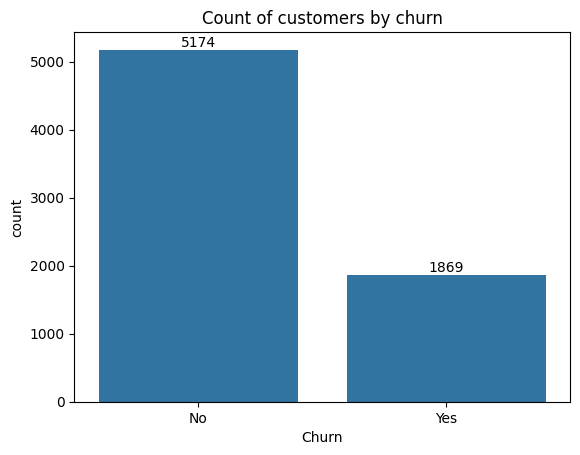

In [12]:
ax = sns.countplot(data = df, x= 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of customers by churn")
plt.show()

In [13]:
gb = df.groupby("Churn").agg({'Churn':'count'})
gb

,Churn
Churn,
No,5174
Yes,1869


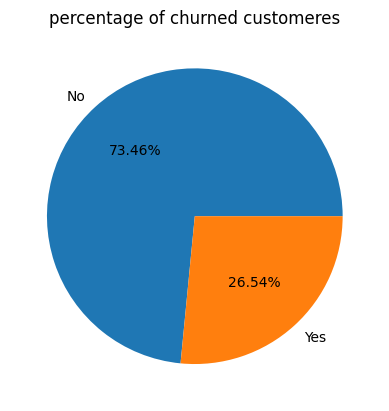

In [14]:
plt.pie(gb['Churn'],labels=gb.index, autopct= "%1.2f%%")
plt.title("percentage of churned customeres")
plt.show()

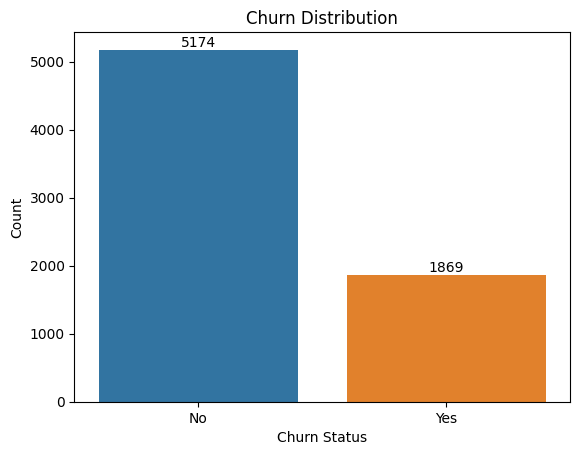

In [15]:
ax = sns.countplot(data=df, x='Churn', hue='Churn', legend=False)
plt.title("Churn Distribution")
plt.xlabel("Churn Status")
plt.ylabel("Count")
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.show()

**from the given pie chart we can conclude that 26.54% of our customers have churned out**

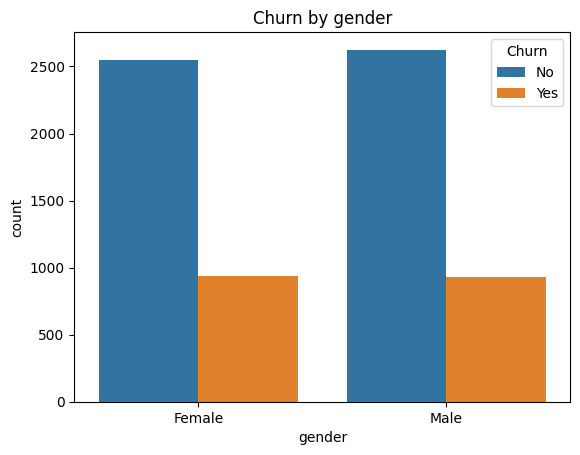

In [16]:
sns.countplot(x="gender", data= df, hue = "Churn")
plt.title("Churn by gender")
plt.show()

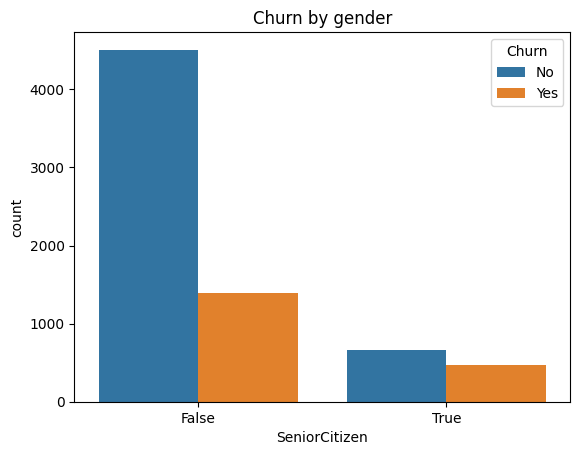

In [17]:
sns.countplot(x="SeniorCitizen", data= df, hue = "Churn")
plt.title("Churn by gender")
plt.show()

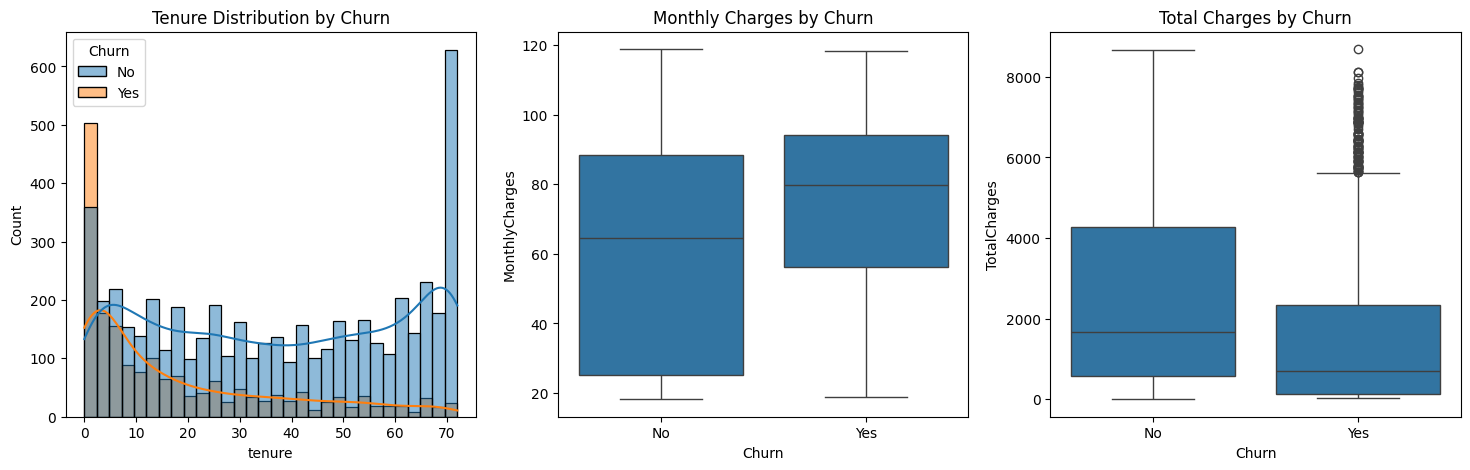

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tenure vs. Churn
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True, ax=axes[0])
axes[0].set_title("Tenure Distribution by Churn")

# Monthly Charges vs. Churn
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', ax=axes[1])
axes[1].set_title("Monthly Charges by Churn")

# Total Charges vs. Churn
sns.boxplot(data=df, x='Churn', y='TotalCharges', ax=axes[2])
axes[2].set_title("Total Charges by Churn")
plt.show()

Insight: Churned customers tend to have higher MonthlyCharges and lower tenure.

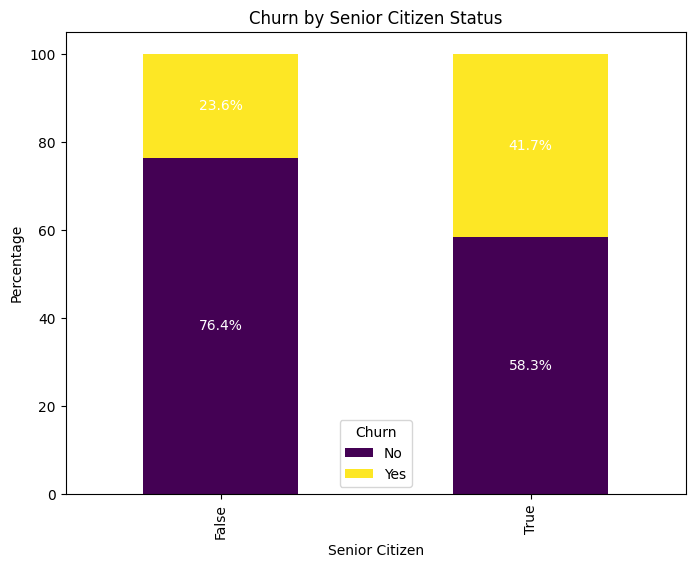

In [19]:
df_grouped = df.groupby(["SeniorCitizen", "Churn"]).size().unstack()
df_percent = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100  # Convert to percentage

# Plot
ax = df_percent.plot(kind="bar", stacked=True, colormap="viridis", figsize=(8,6))

# Add labels
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    if height > 0:  # To avoid zero-value labels
        ax.text(x + width / 2, y + height / 2, f"{height:.1f}%", ha="center", va="center", fontsize=10, color="white")

plt.title("Churn by Senior Citizen Status")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.legend(title="Churn")
plt.show()

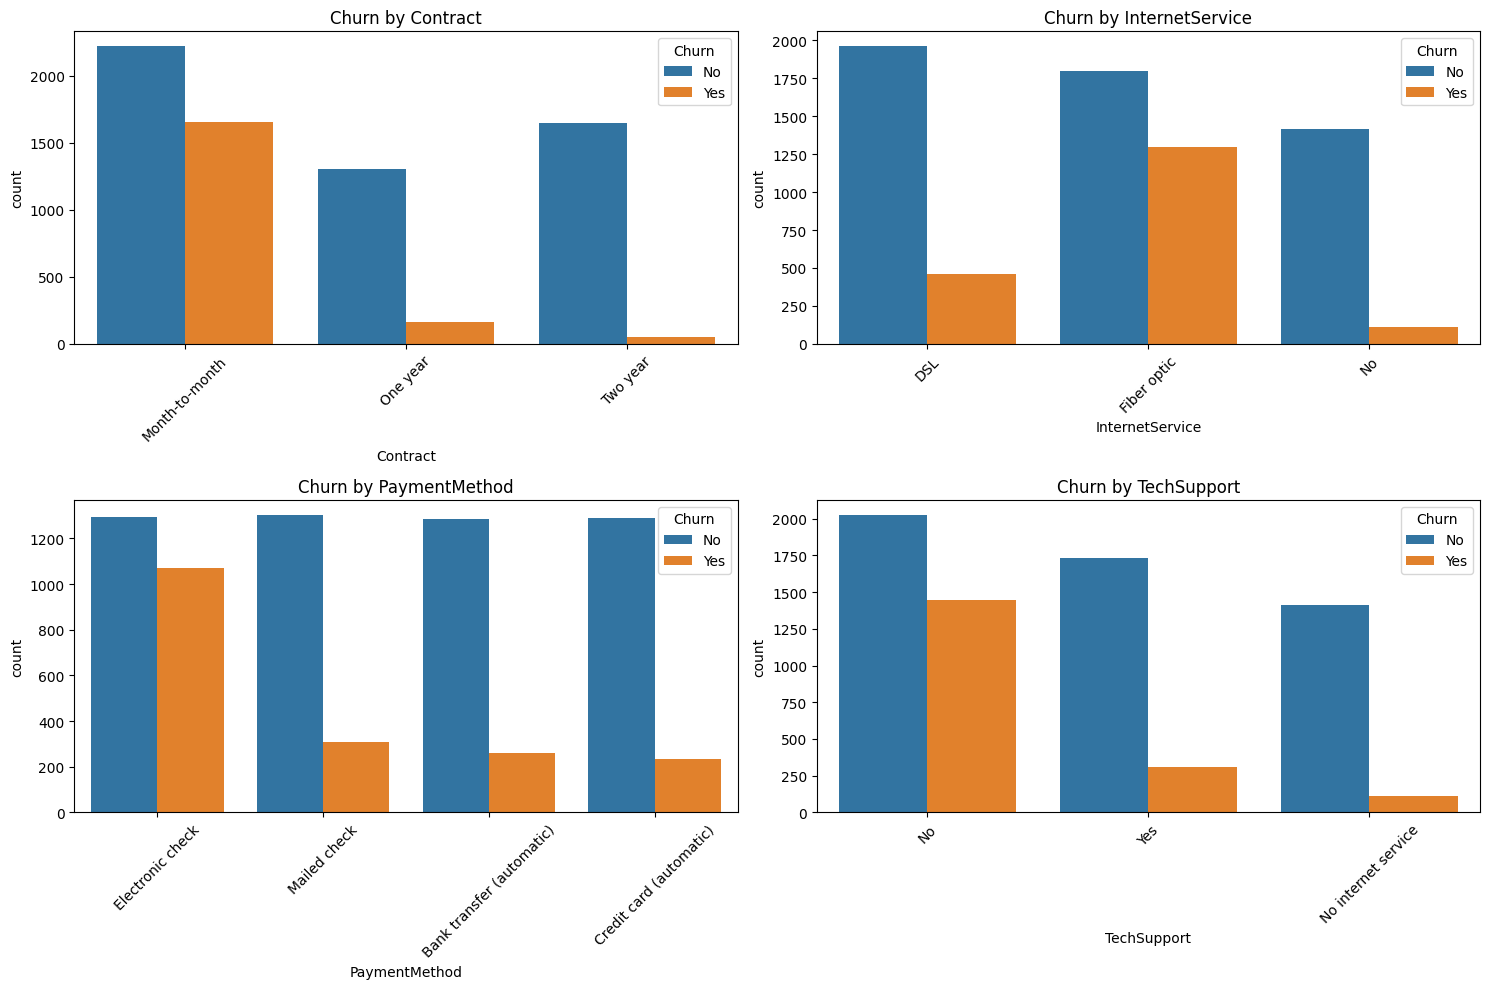

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
features = ['Contract', 'InternetService', 'PaymentMethod', 'TechSupport']

for i, feature in enumerate(features):
    row, col = i//2, i%2
    sns.countplot(data=df, x=feature, hue='Churn', ax=axes[row, col])
    axes[row, col].set_title(f"Churn by {feature}")
    axes[row, col].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Insight: Month-to-month contracts, fiber optic internet, and electronic check payments correlate with higher churn.

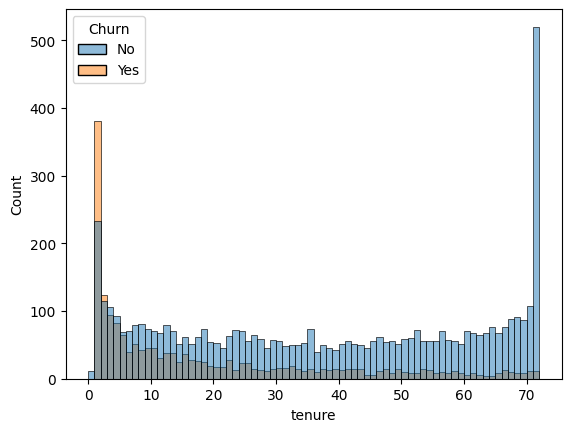

In [21]:
sns.histplot(x= "tenure", data=df, bins=72, hue="Churn")
plt.title("")
plt.show()

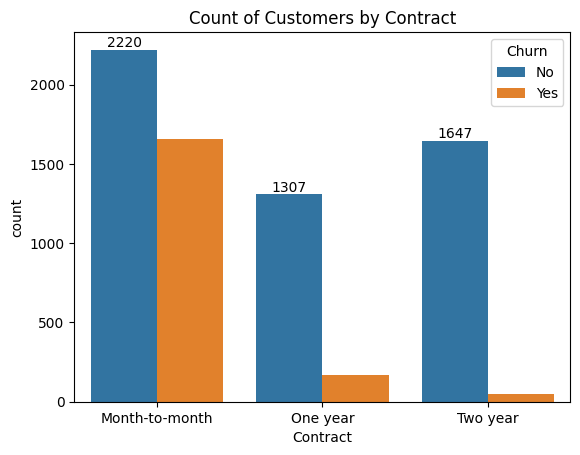

In [22]:
ax = sns.countplot(x="Contract", data= df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

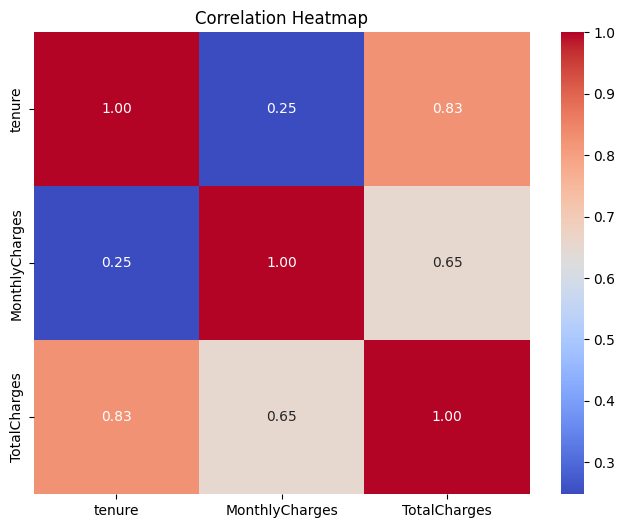

In [23]:
plt.figure(figsize=(8, 6))
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Insight: TotalCharges strongly correlates with tenure, suggesting loyal customers spend more over time.

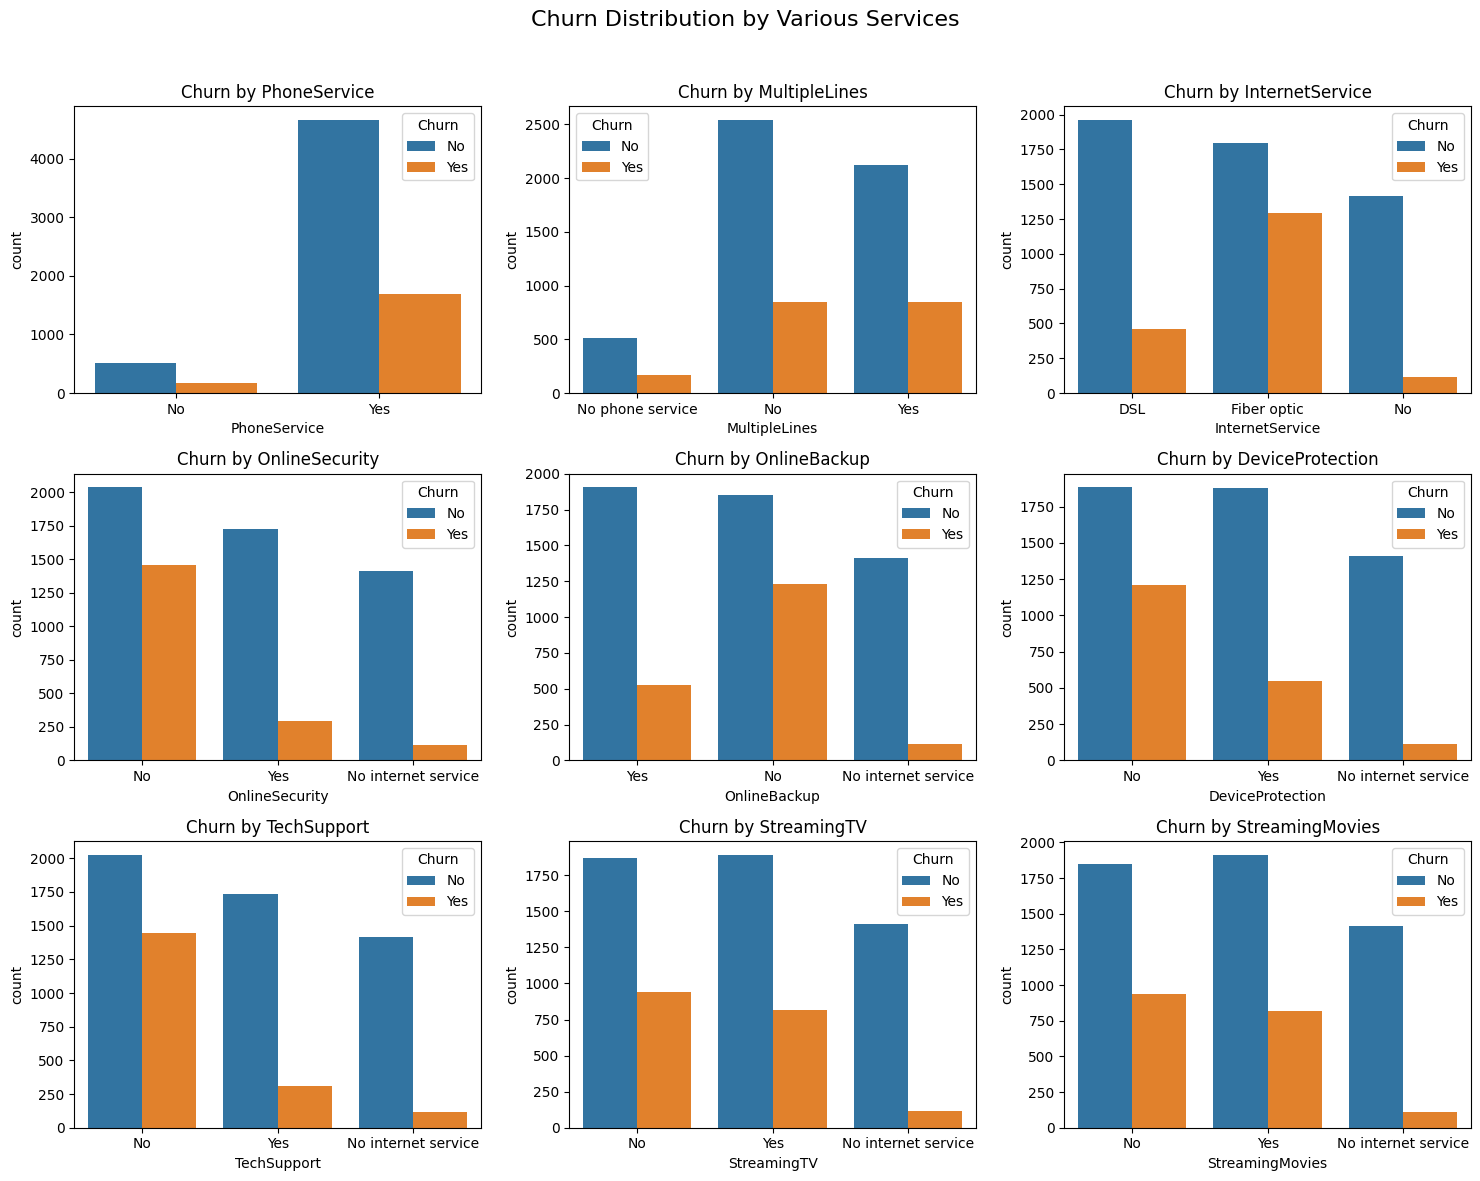

In [24]:
# List of categorical features
features = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]

# Define number of rows and columns for subplots
rows = 3
cols = 3

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
fig.suptitle("Churn Distribution by Various Services", fontsize=16)

# Loop through features and create countplots
for i, feature in enumerate(features):
    row, col = divmod(i, cols)  # Calculate row and column index
    sns.countplot(x=feature, hue="Churn", data=df, ax=axes[row, col])
    axes[row, col].set_title(f"Churn by {feature}")

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


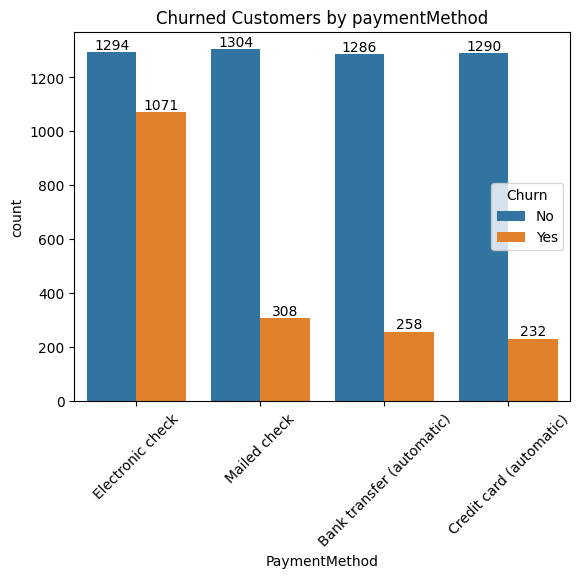

In [25]:
ax = sns.countplot(x="PaymentMethod", data= df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by paymentMethod")
plt.xticks(rotation = 45)
plt.show()

**Summary of Insights**
Churn Rate: 26.54% of customers churned.

*Key Drivers:*

Contract Type: Month-to-month customers churn 3x more than those with long-term contracts.

Payment Method: Electronic check users churn 2x more than others.

Internet Service: Fiber optic users have the highest churn rate (41%).

Cost: Churned customers pay ~25% higher monthly fees on average.

Tenure: Most churn occurs in the first 10 months (new customers are at risk).

Actionable Recommendations:

Incentivize long-term contracts (e.g., discounts for annual commitments).

Improve fiber optic service quality or offer bundled perks.

Target retention campaigns for high-risk groups (e.g., new customers, electronic check users).